In [1]:
import random 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [10]:
NODES = 6
GOAL = 4

ALPHA = 0.02
GAMMA = 0.95
EXPLORE_PROB = 1.0 # epsilon or randomness behaviour

In [11]:
R = {
(0, 1): 0,
(0, 2): 0,
(0, 5): -4,
(1, 0): -1,
(1, 2): 5,
(1, 3): 2,
(1, 5): 0,
(2, 0): -5,
(2, 1): 0,
(2, 3): 10,
(2, 5): 8,
(3, 0): 5,
(3, 1): -3,
(3, 2): 4,
(3, 4): 50,
(3, 5): 2,
(4, 0): -10,
(4, 1): -5,
(4, 2): -20,
(4, 3): 0,
(4, 4): 100,
(4, 5): -50,
(5, 0): -15,
(5, 1): 2,
(5, 2): -7,
(5, 3): 0,
(5, 4): 70,
}

Q = {}

In [12]:
def get_actions(current):
    actions = []
    for rx in xrange(NODES):
        if (current, rx) in R:
            actions.append(rx)
    return actions

get_actions(2)

[0, 1, 3, 5]

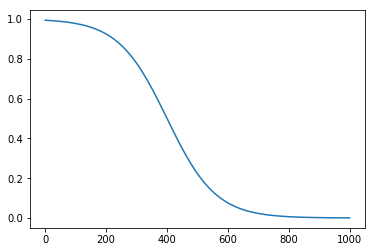

In [13]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def decay(t, total_iter=100, initial_value=None):
    return sigmoid(-1 * (t*25.0) / (2.0*total_iter) + 5)

val = []
N = 1000
for ix in np.linspace(0, N, 200):
    val.append(decay(ix, N, 1.0))
    
plt.plot(np.linspace(0, N, 200), val)
plt.show()

In [15]:
N_ep = 5000 # epsilon greedy alortithm
EXPLORE = True
display_path = True # print path or not
all_rewards = [] 
for ep in range(N_ep):
    pos = 0 # current position
    rew = 0 # current rewards
    steps = 0 
    if display_path:
        print pos,
    while (not pos == GOAL) and steps < 10:
    # for kx in range(20):
        # print pos
        steps += 1
        p_act = get_actions(pos) # possible actions
        
        best = [] 
        q_best = None
        
        for ac in p_act:
            rq = Q.setdefault((pos, ac), 0) # if action exist set that otherwise set 0
            if rq > q_best:
                q_best = rq
                best = [ac]
            elif rq == q_best:
                best.append(ac)
        
        # define exploration
        explore_prob = decay(ep, N_ep, EXPLORE_PROB) # value=1 at start and 0 at end
        
        if np.random.random() < explore_prob and EXPLORE:
            nxt_pos = random.choice(p_act)
        else:
            nxt_pos = random.choice(best)
        if display_path:
            print nxt_pos,
        nxt_p_ac = get_actions(nxt_pos) # next possible action
        
        nq_best = None
        
        for ac in nxt_p_ac:
            rq = Q.setdefault((nxt_pos, ac), 0) # q_values
            nq_best = max(nq_best, rq) 
        
        # Q(s,a) = Q(s,a) + alpha(temporal differnce)
        Q[(pos, nxt_pos)] = (1- ALPHA)*Q[(pos, nxt_pos)] + ALPHA*(R[(pos, nxt_pos)] + GAMMA*nq_best)
        rew += R[(pos, nxt_pos)] # next action reward before taking the action
        pos = nxt_pos # now go to next step
    if display_path:
        print "\nEpisode:", ep, "| Reward:", rew
    all_rewards.append(rew)

0 5 3 5 0 1 3 4 
Episode: 0 | Reward: 35
0 2 5 2 0 1 5 1 0 5 3 
Episode: 1 | Reward: -7
0 2 1 2 0 1 0 1 0 2 0 
Episode: 2 | Reward: -7
0 5 4 
Episode: 3 | Reward: 66
0 5 0 2 3 2 0 1 0 2 5 
Episode: 4 | Reward: -3
0 1 3 2 3 0 2 0 2 3 0 
Episode: 5 | Reward: 31
0 5 4 
Episode: 6 | Reward: 66
0 5 0 1 0 5 0 2 3 5 0 
Episode: 7 | Reward: -42
0 2 3 0 5 2 3 4 
Episode: 8 | Reward: 64
0 2 5 3 4 
Episode: 9 | Reward: 58
0 1 3 2 5 4 
Episode: 10 | Reward: 84
0 5 4 
Episode: 11 | Reward: 66
0 2 5 0 1 5 4 
Episode: 12 | Reward: 63
0 1 2 0 1 3 2 0 5 3 1 
Episode: 13 | Reward: -6
0 5 3 2 0 1 2 1 0 5 3 
Episode: 14 | Reward: -5
0 2 5 1 0 1 5 0 5 0 1 
Episode: 15 | Reward: -25
0 2 5 1 0 1 3 5 2 0 1 
Episode: 16 | Reward: 1
0 2 1 0 1 5 1 2 5 3 0 
Episode: 17 | Reward: 19
0 5 0 1 3 4 
Episode: 18 | Reward: 33
0 2 0 5 2 3 5 3 1 5 3 
Episode: 19 | Reward: -7
0 2 5 2 1 3 5 4 
Episode: 20 | Reward: 75
0 5 3 5 1 2 1 5 2 3 4 
Episode: 21 | Reward: 58
0 1 0 1 5 2 1 2 3 0 5 
Episode: 22 | Reward: 8
0 2 0 5 3 5 

0 5 0 5 0 2 5 2 0 2 5 
Episode: 198 | Reward: -34
0 5 2 5 0 2 5 3 0 5 3 
Episode: 199 | Reward: -9
0 2 3 0 2 3 0 1 0 2 1 
Episode: 200 | Reward: 29
0 5 4 
Episode: 201 | Reward: 66
0 5 4 
Episode: 202 | Reward: 66
0 2 3 0 1 5 4 
Episode: 203 | Reward: 85
0 1 2 1 2 1 3 2 0 1 3 
Episode: 204 | Reward: 13
0 2 1 5 0 1 5 0 1 5 4 
Episode: 205 | Reward: 40
0 1 3 2 3 1 5 2 0 5 4 
Episode: 206 | Reward: 67
0 2 5 4 
Episode: 207 | Reward: 78
0 2 1 3 0 2 1 0 5 1 2 
Episode: 208 | Reward: 9
0 5 0 2 0 2 0 2 1 5 3 
Episode: 209 | Reward: -29
0 2 5 0 1 5 4 
Episode: 210 | Reward: 63
0 5 3 0 1 3 4 
Episode: 211 | Reward: 53
0 5 0 2 3 2 1 2 3 4 
Episode: 212 | Reward: 60
0 2 3 0 5 4 
Episode: 213 | Reward: 81
0 5 4 
Episode: 214 | Reward: 66
0 5 2 0 1 5 4 
Episode: 215 | Reward: 54
0 1 5 1 5 0 5 0 1 5 1 
Episode: 216 | Reward: -30
0 5 3 5 1 0 1 2 0 2 5 
Episode: 217 | Reward: 7
0 5 2 5 1 5 3 2 3 1 3 
Episode: 218 | Reward: 12
0 2 3 2 1 2 1 3 1 3 1 
Episode: 219 | Reward: 17
0 2 3 4 
Episode: 220 | Rew

0 5 0 5 2 5 3 0 1 3 2 
Episode: 386 | Reward: -11
0 2 5 0 1 0 2 3 1 2 1 
Episode: 387 | Reward: 4
0 5 4 
Episode: 388 | Reward: 66
0 2 0 2 1 0 2 5 4 
Episode: 389 | Reward: 72
0 5 4 
Episode: 390 | Reward: 66
0 1 2 1 2 5 3 1 5 0 1 
Episode: 391 | Reward: 0
0 1 2 3 0 1 5 4 
Episode: 392 | Reward: 90
0 5 2 5 4 
Episode: 393 | Reward: 67
0 2 3 4 
Episode: 394 | Reward: 60
0 2 0 2 5 4 
Episode: 395 | Reward: 73
0 2 5 3 1 2 5 2 1 3 5 
Episode: 396 | Reward: 15
0 1 2 0 1 3 0 2 0 2 5 
Episode: 397 | Reward: 10
0 2 0 1 5 1 5 0 2 0 5 
Episode: 398 | Reward: -27
0 1 5 0 2 5 4 
Episode: 399 | Reward: 63
0 2 3 5 1 2 0 1 5 3 4 
Episode: 400 | Reward: 64
0 5 3 2 0 5 2 0 1 2 1 
Episode: 401 | Reward: -16
0 1 5 0 5 2 3 0 5 3 0 
Episode: 402 | Reward: -10
0 5 2 5 1 3 4 
Episode: 403 | Reward: 51
0 5 4 
Episode: 404 | Reward: 66
0 1 0 5 4 
Episode: 405 | Reward: 65
0 2 0 1 3 0 5 1 2 5 3 
Episode: 406 | Reward: 13
0 5 1 5 2 5 0 5 0 2 1 
Episode: 407 | Reward: -35
0 2 5 3 1 0 1 2 0 1 5 
Episode: 408 | Rew

0 2 5 2 0 2 0 1 2 5 3 
Episode: 581 | Reward: 4
0 5 0 5 2 5 3 5 3 5 2 
Episode: 582 | Reward: -25
0 1 3 4 
Episode: 583 | Reward: 52
0 1 2 0 1 0 2 1 2 1 5 
Episode: 584 | Reward: 4
0 1 3 1 0 1 5 0 1 5 3 
Episode: 585 | Reward: -17
0 5 2 3 4 
Episode: 586 | Reward: 49
0 1 0 1 5 4 
Episode: 587 | Reward: 69
0 1 3 4 
Episode: 588 | Reward: 52
0 5 2 1 3 2 5 2 0 2 1 
Episode: 589 | Reward: -9
0 1 3 4 
Episode: 590 | Reward: 52
0 5 1 0 5 4 
Episode: 591 | Reward: 63
0 1 2 5 0 2 3 5 3 0 5 
Episode: 592 | Reward: 11
0 1 3 4 
Episode: 593 | Reward: 52
0 2 3 5 3 2 5 3 2 5 1 
Episode: 594 | Reward: 38
0 5 0 5 0 2 3 1 0 5 1 
Episode: 595 | Reward: -34
0 2 3 5 0 5 4 
Episode: 596 | Reward: 63
0 5 2 3 2 5 4 
Episode: 597 | Reward: 81
0 1 3 0 1 0 2 3 1 0 1 
Episode: 598 | Reward: 12
0 1 5 2 5 0 5 2 5 3 1 
Episode: 599 | Reward: -20
0 2 3 5 3 4 
Episode: 600 | Reward: 62
0 1 2 3 5 3 2 3 5 3 2 
Episode: 601 | Reward: 37
0 5 0 1 0 5 1 3 0 1 3 
Episode: 602 | Reward: -13
0 2 1 2 1 5 3 0 1 3 0 
Episode: 6

0 5 0 5 1 0 5 4 
Episode: 769 | Reward: 44
0 5 1 2 1 5 3 4 
Episode: 770 | Reward: 53
0 2 0 5 4 
Episode: 771 | Reward: 61
0 5 2 3 1 0 2 3 4 
Episode: 772 | Reward: 55
0 2 1 0 5 3 5 0 2 3 5 
Episode: 773 | Reward: -6
0 2 5 2 1 3 1 5 0 1 2 
Episode: 774 | Reward: -10
0 2 3 2 1 5 4 
Episode: 775 | Reward: 84
0 5 3 0 1 5 3 4 
Episode: 776 | Reward: 51
0 2 3 1 5 3 1 0 1 5 0 
Episode: 777 | Reward: -12
0 5 3 5 1 0 1 0 1 0 5 
Episode: 778 | Reward: -7
0 2 1 2 0 2 3 1 5 3 4 
Episode: 779 | Reward: 57
0 1 5 0 1 2 0 1 5 0 1 
Episode: 780 | Reward: -30
0 5 2 1 2 1 3 4 
Episode: 781 | Reward: 46
0 1 0 1 5 1 2 3 5 2 0 
Episode: 782 | Reward: 6
0 1 5 3 0 1 0 2 1 5 2 
Episode: 783 | Reward: -3
0 2 5 3 2 1 0 1 5 1 2 
Episode: 784 | Reward: 18
0 2 1 3 5 2 3 2 3 1 2 
Episode: 785 | Reward: 23
0 1 0 1 2 3 0 2 3 1 5 
Episode: 786 | Reward: 26
0 2 3 5 1 3 4 
Episode: 787 | Reward: 66
0 2 3 0 2 5 3 5 0 5 4 
Episode: 788 | Reward: 76
0 2 0 2 5 3 5 0 2 3 4 
Episode: 789 | Reward: 50
0 2 3 0 2 5 0 2 1 3 2 
Ep

0 5 2 0 2 0 2 1 0 1 3 
Episode: 970 | Reward: -20
0 1 0 1 0 5 2 1 0 5 0 
Episode: 971 | Reward: -33
0 2 1 0 2 0 1 2 0 2 5 
Episode: 972 | Reward: 2
0 1 0 2 1 2 0 1 3 2 1 
Episode: 973 | Reward: 5
0 1 2 3 4 
Episode: 974 | Reward: 65
0 2 0 1 2 1 0 1 2 0 2 
Episode: 975 | Reward: -1
0 2 1 5 2 0 1 5 1 5 4 
Episode: 976 | Reward: 60
0 2 0 1 2 1 3 1 2 5 1 
Episode: 977 | Reward: 14
0 2 5 2 5 1 0 2 3 4 
Episode: 978 | Reward: 70
0 2 1 3 5 1 3 1 3 1 5 
Episode: 979 | Reward: 4
0 5 0 2 0 5 1 0 1 2 3 
Episode: 980 | Reward: -12
0 5 4 
Episode: 981 | Reward: 66
0 2 0 2 0 2 1 0 5 0 2 
Episode: 982 | Reward: -30
0 1 3 1 5 1 2 3 5 2 0 
Episode: 983 | Reward: 6
0 1 0 5 0 2 3 0 1 3 1 
Episode: 984 | Reward: -6
0 1 3 4 
Episode: 985 | Reward: 52
0 5 2 3 1 5 0 2 3 1 0 
Episode: 986 | Reward: -13
0 2 3 1 0 5 1 2 5 3 5 
Episode: 987 | Reward: 19
0 2 3 2 3 0 2 0 5 4 
Episode: 988 | Reward: 90
0 2 0 5 0 1 5 2 5 3 4 
Episode: 989 | Reward: 27
0 2 5 4 
Episode: 990 | Reward: 78
0 2 0 1 2 0 5 0 2 0 1 
Episode

0 5 2 3 2 1 2 3 5 2 3 
Episode: 1167 | Reward: 23
0 2 5 4 
Episode: 1168 | Reward: 78
0 2 0 1 3 1 5 4 
Episode: 1169 | Reward: 64
0 2 3 1 3 2 0 2 0 2 3 
Episode: 1170 | Reward: 13
0 1 0 2 3 2 3 2 3 4 
Episode: 1171 | Reward: 87
0 1 0 2 0 5 1 2 0 1 2 
Episode: 1172 | Reward: -3
0 2 5 3 0 5 0 1 2 1 3 
Episode: 1173 | Reward: 1
0 2 1 2 1 0 2 0 5 4 
Episode: 1174 | Reward: 65
0 2 5 1 2 1 5 2 5 4 
Episode: 1175 | Reward: 86
0 2 3 4 
Episode: 1176 | Reward: 60
0 2 3 4 
Episode: 1177 | Reward: 60
0 5 2 1 3 5 2 3 1 2 3 
Episode: 1178 | Reward: 8
0 2 0 5 1 3 0 2 3 4 
Episode: 1179 | Reward: 60
0 2 3 0 1 3 2 5 4 
Episode: 1180 | Reward: 99
0 1 5 2 5 0 5 0 1 2 1 
Episode: 1181 | Reward: -28
0 5 3 5 0 1 3 2 3 2 0 
Episode: 1182 | Reward: -2
0 5 3 5 4 
Episode: 1183 | Reward: 68
0 2 3 0 2 5 0 1 3 0 2 
Episode: 1184 | Reward: 15
0 2 0 2 1 0 5 0 2 1 5 
Episode: 1185 | Reward: -25
0 2 1 2 3 0 1 2 1 2 1 
Episode: 1186 | Reward: 30
0 1 3 1 2 0 1 2 3 1 2 
Episode: 1187 | Reward: 16
0 5 4 
Episode: 1188 |

0 2 1 3 4 
Episode: 1362 | Reward: 52
0 2 5 3 2 0 5 2 3 2 3 
Episode: 1363 | Reward: 20
0 2 0 1 3 2 1 2 0 1 2 
Episode: 1364 | Reward: 6
0 5 0 2 3 0 5 2 3 2 0 
Episode: 1365 | Reward: -6
0 5 3 0 1 0 1 5 3 5 3 
Episode: 1366 | Reward: 2
0 5 1 3 1 0 1 2 0 5 1 
Episode: 1367 | Reward: -6
0 1 3 2 3 2 5 4 
Episode: 1368 | Reward: 98
0 2 3 0 1 2 5 0 1 3 4 
Episode: 1369 | Reward: 65
0 2 3 0 2 5 1 2 1 2 5 
Episode: 1370 | Reward: 43
0 2 0 2 3 5 4 
Episode: 1371 | Reward: 77
0 2 1 3 2 0 1 0 5 4 
Episode: 1372 | Reward: 66
0 1 0 1 3 0 1 0 2 0 2 
Episode: 1373 | Reward: 0
0 2 5 1 3 5 0 2 3 5 1 
Episode: 1374 | Reward: 13
0 2 0 1 0 1 0 5 1 0 1 
Episode: 1375 | Reward: -10
0 5 4 
Episode: 1376 | Reward: 66
0 5 2 3 1 5 3 2 5 1 3 
Episode: 1377 | Reward: 12
0 1 2 1 2 0 2 5 3 2 0 
Episode: 1378 | Reward: 12
0 5 3 2 5 0 5 1 0 2 0 
Episode: 1379 | Reward: -15
0 1 5 1 5 0 1 3 4 
Episode: 1380 | Reward: 39
0 1 3 4 
Episode: 1381 | Reward: 52
0 5 4 
Episode: 1382 | Reward: 66
0 2 1 2 5 4 
Episode: 1383 | 

0 2 5 2 3 0 2 0 1 5 1 
Episode: 1564 | Reward: 13
0 1 2 5 1 2 1 2 1 2 0 
Episode: 1565 | Reward: 25
0 2 0 5 1 0 1 5 1 5 2 
Episode: 1566 | Reward: -13
0 2 3 1 0 1 2 5 2 0 2 
Episode: 1567 | Reward: 7
0 2 0 1 2 0 5 0 1 2 3 
Episode: 1568 | Reward: -9
0 2 5 1 2 1 2 1 0 2 1 
Episode: 1569 | Reward: 19
0 2 1 2 3 0 5 3 2 3 1 
Episode: 1570 | Reward: 27
0 1 2 3 2 3 2 3 1 3 0 
Episode: 1571 | Reward: 47
0 5 0 1 5 2 3 1 2 3 4 
Episode: 1572 | Reward: 46
0 5 1 2 5 4 
Episode: 1573 | Reward: 81
0 1 3 2 3 0 2 1 3 1 5 
Episode: 1574 | Reward: 20
0 5 2 0 2 3 0 2 3 2 1 
Episode: 1575 | Reward: 13
0 2 3 1 2 0 5 1 5 1 2 
Episode: 1576 | Reward: 12
0 5 3 1 3 4 
Episode: 1577 | Reward: 45
0 2 5 4 
Episode: 1578 | Reward: 78
0 2 0 1 2 3 2 3 0 1 2 
Episode: 1579 | Reward: 34
0 2 3 2 0 2 3 4 
Episode: 1580 | Reward: 69
0 2 3 2 0 2 1 2 0 2 5 
Episode: 1581 | Reward: 17
0 2 0 2 3 2 0 2 5 4 
Episode: 1582 | Reward: 82
0 5 0 2 3 0 2 3 2 1 2 
Episode: 1583 | Reward: 15
0 5 3 2 1 2 3 5 1 2 3 
Episode: 1584 | Rew

0 5 1 2 3 1 2 1 2 3 0 
Episode: 1756 | Reward: 35
0 2 5 1 2 3 2 1 0 2 1 
Episode: 1757 | Reward: 28
0 2 1 5 1 0 1 3 5 0 2 
Episode: 1758 | Reward: -10
0 2 3 2 5 4 
Episode: 1759 | Reward: 92
0 2 1 5 1 2 1 5 0 2 5 
Episode: 1760 | Reward: 0
0 2 3 0 5 1 3 2 0 2 3 
Episode: 1761 | Reward: 24
0 1 2 3 5 1 0 2 0 2 5 
Episode: 1762 | Reward: 21
0 2 1 2 3 1 2 3 2 3 1 
Episode: 1763 | Reward: 38
0 2 3 2 3 5 1 5 1 2 3 
Episode: 1764 | Reward: 45
0 2 3 2 5 2 0 5 3 2 3 
Episode: 1765 | Reward: 20
0 2 3 2 0 2 1 0 2 0 2 
Episode: 1766 | Reward: 3
0 1 2 1 5 1 2 0 2 3 1 
Episode: 1767 | Reward: 14
0 2 0 2 3 5 3 2 3 1 2 
Episode: 1768 | Reward: 23
0 1 2 5 1 3 0 2 1 0 2 
Episode: 1769 | Reward: 21
0 2 3 1 3 5 1 2 3 2 3 
Episode: 1770 | Reward: 42
0 2 1 3 2 3 4 
Episode: 1771 | Reward: 66
0 2 3 1 0 1 0 2 0 2 3 
Episode: 1772 | Reward: 10
0 5 2 3 5 0 1 3 0 1 3 
Episode: 1773 | Reward: -5
0 2 3 5 0 1 2 3 0 2 3 
Episode: 1774 | Reward: 27
0 1 2 3 0 1 5 4 
Episode: 1775 | Reward: 90
0 2 1 2 0 5 4 
Episode: 1

0 2 3 2 1 2 0 2 0 5 1 
Episode: 1945 | Reward: 7
0 2 0 2 3 2 3 2 5 4 
Episode: 1946 | Reward: 101
0 5 1 2 3 5 4 
Episode: 1947 | Reward: 85
0 2 3 5 4 
Episode: 1948 | Reward: 82
0 2 5 4 
Episode: 1949 | Reward: 78
0 2 0 2 3 1 2 3 4 
Episode: 1950 | Reward: 67
0 2 3 0 2 5 1 2 3 5 2 
Episode: 1951 | Reward: 35
0 1 2 1 3 5 1 2 5 1 2 
Episode: 1952 | Reward: 31
0 2 3 2 3 0 2 5 1 2 5 
Episode: 1953 | Reward: 52
0 2 3 2 5 2 3 2 3 2 3 
Episode: 1954 | Reward: 53
0 2 3 2 3 1 2 3 1 2 3 
Episode: 1955 | Reward: 48
0 2 3 2 3 2 3 2 5 3 2 
Episode: 1956 | Reward: 54
0 2 3 4 
Episode: 1957 | Reward: 60
0 2 1 5 3 2 3 2 3 2 1 
Episode: 1958 | Reward: 32
0 2 3 4 
Episode: 1959 | Reward: 60
0 2 3 2 0 2 3 5 1 2 3 
Episode: 1960 | Reward: 38
0 2 3 0 2 3 2 5 1 3 2 
Episode: 1961 | Reward: 45
0 2 3 2 3 4 
Episode: 1962 | Reward: 74
0 5 2 3 2 3 2 5 0 2 3 
Episode: 1963 | Reward: 20
0 1 2 3 2 3 0 2 1 2 3 
Episode: 1964 | Reward: 49
0 2 5 1 2 1 2 3 2 5 1 
Episode: 1965 | Reward: 44
0 2 3 5 1 0 5 4 
Episode: 19

0 5 1 2 3 5 1 2 3 0 1 
Episode: 2132 | Reward: 37
0 1 2 3 2 3 2 5 1 5 1 
Episode: 2133 | Reward: 45
0 2 3 4 
Episode: 2134 | Reward: 60
0 2 3 2 1 2 3 2 3 0 2 
Episode: 2135 | Reward: 48
0 2 1 2 3 5 4 
Episode: 2136 | Reward: 87
0 2 3 2 5 1 3 1 2 1 2 
Episode: 2137 | Reward: 33
0 2 5 0 2 3 2 1 2 3 2 
Episode: 2138 | Reward: 26
0 2 3 2 0 2 5 3 2 5 1 
Episode: 2139 | Reward: 31
0 2 3 4 
Episode: 2140 | Reward: 60
0 2 5 1 3 5 1 2 3 2 1 
Episode: 2141 | Reward: 35
0 2 5 1 2 3 0 2 3 4 
Episode: 2142 | Reward: 90
0 5 1 2 3 2 3 2 3 5 1 
Episode: 2143 | Reward: 45
0 2 3 4 
Episode: 2144 | Reward: 60
0 2 3 2 3 0 1 5 1 2 0 
Episode: 2145 | Reward: 31
0 5 1 2 3 4 
Episode: 2146 | Reward: 63
0 2 0 2 3 4 
Episode: 2147 | Reward: 55
0 1 2 3 0 2 3 2 3 2 1 
Episode: 2148 | Reward: 48
0 2 0 2 3 2 3 2 3 2 0 
Episode: 2149 | Reward: 32
0 1 2 5 0 2 5 1 2 3 2 
Episode: 2150 | Reward: 27
0 1 2 3 2 3 5 1 2 3 5 
Episode: 2151 | Reward: 50
0 2 3 2 5 2 0 2 3 0 2 
Episode: 2152 | Reward: 25
0 1 2 0 2 3 2 3 0 2 5 

0 1 2 3 2 3 2 3 2 0 1 
Episode: 2309 | Reward: 42
0 2 3 0 2 3 4 
Episode: 2310 | Reward: 75
0 2 3 2 5 1 2 5 1 2 3 
Episode: 2311 | Reward: 54
0 2 3 5 1 3 2 1 2 0 2 
Episode: 2312 | Reward: 20
0 1 2 5 1 2 3 2 3 2 3 
Episode: 2313 | Reward: 58
0 2 3 2 3 2 5 1 0 2 3 
Episode: 2314 | Reward: 47
0 2 3 2 1 0 2 5 3 2 0 
Episode: 2315 | Reward: 20
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2316 | Reward: 66
0 2 3 2 1 2 3 2 3 2 3 
Episode: 2317 | Reward: 57
0 2 3 2 3 2 5 1 2 3 2 
Episode: 2318 | Reward: 57
0 1 0 2 3 4 
Episode: 2319 | Reward: 59
0 2 3 2 3 4 
Episode: 2320 | Reward: 74
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2321 | Reward: 66
0 2 3 2 3 1 0 2 3 2 3 
Episode: 2322 | Reward: 44
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2323 | Reward: 66
0 2 3 2 5 1 2 3 2 3 2 
Episode: 2324 | Reward: 57
0 2 0 2 3 4 
Episode: 2325 | Reward: 55
0 5 1 2 3 0 2 3 2 3 5 
Episode: 2326 | Reward: 44
0 2 3 2 3 1 2 3 2 3 2 
Episode: 2327 | Reward: 54
0 5 1 0 2 3 2 3 2 3 2 
Episode: 2328 | Reward: 39
0 2 3 2 3 2 0 2 3 2 3 
Episode: 2329 |

0 2 3 1 2 3 2 3 2 3 2 
Episode: 2485 | Reward: 54
0 2 3 2 3 2 3 2 3 4 
Episode: 2486 | Reward: 102
0 2 3 2 1 2 5 1 2 3 2 
Episode: 2487 | Reward: 48
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2488 | Reward: 66
0 2 3 2 5 4 
Episode: 2489 | Reward: 92
0 2 1 2 3 2 3 2 3 2 3 
Episode: 2490 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2491 | Reward: 66
0 2 3 1 2 3 2 3 2 3 2 
Episode: 2492 | Reward: 54
0 2 3 2 3 2 1 2 3 2 3 
Episode: 2493 | Reward: 57
0 2 3 4 
Episode: 2494 | Reward: 60
0 1 2 0 2 3 2 3 2 3 2 
Episode: 2495 | Reward: 42
0 5 1 2 3 2 3 2 3 2 3 
Episode: 2496 | Reward: 55
0 5 1 2 1 2 3 2 3 2 3 
Episode: 2497 | Reward: 46
0 2 3 2 3 2 3 2 1 5 1 
Episode: 2498 | Reward: 44
0 2 1 2 3 2 3 2 3 2 3 
Episode: 2499 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2500 | Reward: 66
0 2 3 2 3 2 0 2 3 2 3 
Episode: 2501 | Reward: 47
0 2 5 1 2 3 1 5 1 2 3 
Episode: 2502 | Reward: 39
0 2 3 2 3 2 3 1 2 3 2 
Episode: 2503 | Reward: 54
0 5 1 2 3 2 3 2 1 2 3 
Episode: 2504 | Reward: 46
0 2 3 2 3 2 3 2 3 2 5 
Ep

0 5 1 2 3 2 3 2 3 2 3 
Episode: 2661 | Reward: 55
0 2 3 0 2 3 2 3 2 3 2 
Episode: 2662 | Reward: 57
0 2 0 1 2 3 2 3 2 3 2 
Episode: 2663 | Reward: 42
0 2 3 2 3 5 1 2 3 1 2 
Episode: 2664 | Reward: 45
0 2 3 2 3 2 3 2 3 2 0 
Episode: 2665 | Reward: 51
0 2 3 2 0 2 3 2 3 2 3 
Episode: 2666 | Reward: 47
0 2 3 2 3 1 2 3 2 3 2 
Episode: 2667 | Reward: 54
0 2 3 2 3 2 3 5 1 2 3 
Episode: 2668 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2669 | Reward: 66
0 2 3 4 
Episode: 2670 | Reward: 60
0 2 3 2 3 2 3 4 
Episode: 2671 | Reward: 88
0 2 3 2 3 2 3 2 1 2 3 
Episode: 2672 | Reward: 57
0 2 3 2 3 2 3 2 0 2 3 
Episode: 2673 | Reward: 47
0 2 3 2 0 2 3 2 3 2 3 
Episode: 2674 | Reward: 47
0 2 3 2 3 2 3 4 
Episode: 2675 | Reward: 88
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2676 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2677 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2678 | Reward: 66
0 2 3 2 3 2 3 1 2 3 2 
Episode: 2679 | Reward: 54
0 2 3 2 3 2 3 2 3 1 2 
Episode: 2680 | Reward: 54
0 2 1 0 2 3 2 3 2 5 1 
Epi

0 2 3 2 3 5 1 2 3 2 3 
Episode: 2848 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2849 | Reward: 66
0 2 0 2 3 2 3 2 0 2 3 
Episode: 2850 | Reward: 28
0 2 3 2 5 1 2 0 2 3 5 
Episode: 2851 | Reward: 36
0 2 0 2 3 2 3 2 3 2 3 
Episode: 2852 | Reward: 47
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2853 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2854 | Reward: 66
0 2 3 2 3 2 3 2 3 5 1 
Episode: 2855 | Reward: 56
0 2 3 2 3 2 3 2 3 4 
Episode: 2856 | Reward: 102
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2857 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2858 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2859 | Reward: 66
0 2 3 1 2 3 2 1 2 3 2 
Episode: 2860 | Reward: 45
0 2 3 2 3 2 3 2 3 0 2 
Episode: 2861 | Reward: 57
0 1 2 3 2 3 2 3 2 3 2 
Episode: 2862 | Reward: 61
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2863 | Reward: 66
0 1 0 2 3 2 3 2 3 2 3 
Episode: 2864 | Reward: 51
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2865 | Reward: 66
0 2 3 5 1 2 3 2 3 2 3 
Episode: 2866 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 2867 | Reward: 66
0

0 2 3 2 3 2 3 5 4 
Episode: 3028 | Reward: 110
0 2 3 0 2 3 2 3 2 3 2 
Episode: 3029 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3030 | Reward: 66
0 2 5 1 2 3 2 3 2 3 2 
Episode: 3031 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3032 | Reward: 66
0 2 3 2 3 2 1 2 3 0 2 
Episode: 3033 | Reward: 48
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3034 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3035 | Reward: 66
0 1 2 3 2 3 2 3 2 3 2 
Episode: 3036 | Reward: 61
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3037 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3038 | Reward: 66
0 1 2 3 2 3 2 3 2 3 2 
Episode: 3039 | Reward: 61
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3040 | Reward: 66
0 2 3 2 5 1 2 3 2 3 2 
Episode: 3041 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3042 | Reward: 66
0 2 3 2 3 0 2 3 2 3 2 
Episode: 3043 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3044 | Reward: 66
0 2 3 2 3 4 
Episode: 3045 | Reward: 74
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3046 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3047 | Reward: 66
0 2 3 2 3 2 3

0 2 3 2 3 2 3 2 1 2 3 
Episode: 3209 | Reward: 57
0 2 3 2 1 2 3 2 3 2 3 
Episode: 3210 | Reward: 57
0 2 0 2 3 2 3 2 3 2 3 
Episode: 3211 | Reward: 47
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3212 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3213 | Reward: 66
0 2 3 2 3 2 3 5 1 2 3 
Episode: 3214 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3215 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3216 | Reward: 66
0 2 3 2 3 2 3 4 
Episode: 3217 | Reward: 88
0 2 3 4 
Episode: 3218 | Reward: 60
0 2 3 2 3 2 3 2 3 1 2 
Episode: 3219 | Reward: 54
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3220 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3221 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3222 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3223 | Reward: 66
0 2 3 2 3 2 0 2 3 2 3 
Episode: 3224 | Reward: 47
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3225 | Reward: 66
0 2 3 0 2 3 2 3 2 3 2 
Episode: 3226 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3227 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3228 | Reward: 66
0 2 3 2 3 2 3 2 3 2 

0 2 3 2 3 2 3 2 3 2 3 
Episode: 3381 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3382 | Reward: 66
0 2 1 2 3 2 3 2 3 2 3 
Episode: 3383 | Reward: 57
0 2 3 2 3 2 3 2 3 2 1 
Episode: 3384 | Reward: 56
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3385 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3386 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3387 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3388 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3389 | Reward: 66
0 2 3 2 3 1 2 3 2 3 2 
Episode: 3390 | Reward: 54
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3391 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3392 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3393 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3394 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3395 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3396 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3397 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3398 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3399 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3400 | Reward: 66


0 2 3 2 3 2 3 2 3 2 3 
Episode: 3559 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3560 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3561 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3562 | Reward: 66
0 2 3 4 
Episode: 3563 | Reward: 60
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3564 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3565 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3566 | Reward: 66
0 2 3 2 3 2 3 2 1 0 2 
Episode: 3567 | Reward: 41
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3568 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3569 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3570 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3571 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3572 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3573 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3574 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3575 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3576 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3577 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3578 | Reward: 66
0 2 3 2 3 2 3 

Episode: 3740 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3741 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3742 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3743 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3744 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3745 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3746 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3747 | Reward: 66
0 2 3 2 1 2 3 2 3 2 3 
Episode: 3748 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3749 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3750 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3751 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3752 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3753 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3754 | Reward: 66
0 2 3 2 3 2 1 2 3 2 3 
Episode: 3755 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3756 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3757 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3758 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3759 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 


0 2 3 2 3 2 3 4 
Episode: 3928 | Reward: 88
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3929 | Reward: 66
0 2 3 2 3 2 3 4 
Episode: 3930 | Reward: 88
0 2 3 2 3 2 3 2 1 2 3 
Episode: 3931 | Reward: 57
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3932 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3933 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3934 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3935 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3936 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3937 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3938 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3939 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3940 | Reward: 66
0 2 3 2 3 1 2 3 2 3 2 
Episode: 3941 | Reward: 54
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3942 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3943 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3944 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3945 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3946 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 3947 | Reward: 66
0 2 3 2 3 2 

0 2 3 2 3 2 3 2 3 2 3 
Episode: 4097 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4098 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4099 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4100 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4101 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4102 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4103 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4104 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4105 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4106 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4107 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4108 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4109 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4110 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4111 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4112 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4113 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4114 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4115 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4116 | Reward: 66


0 2 3 2 3 2 3 2 3 2 3 
Episode: 4274 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4275 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4276 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4277 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4278 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4279 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4280 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4281 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4282 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4283 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4284 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4285 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4286 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4287 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4288 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4289 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4290 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4291 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4292 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4293 | Reward: 66


0 2 3 2 3 2 3 2 3 2 3 
Episode: 4456 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4457 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4458 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4459 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4460 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4461 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4462 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4463 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4464 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4465 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4466 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4467 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4468 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4469 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4470 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4471 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4472 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4473 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4474 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4475 | Reward: 66


0 2 3 2 3 2 3 2 3 2 3 
Episode: 4632 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4633 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4634 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4635 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4636 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4637 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4638 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4639 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4640 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4641 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4642 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4643 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4644 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4645 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4646 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4647 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4648 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4649 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4650 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4651 | Reward: 66


0 2 3 2 3 2 3 2 3 2 3 
Episode: 4816 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4817 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4818 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4819 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4820 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4821 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4822 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4823 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4824 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4825 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4826 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4827 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4828 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4829 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4830 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4831 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4832 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4833 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4834 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4835 | Reward: 66


0 2 3 2 3 2 3 2 3 2 3 
Episode: 4989 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4990 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4991 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4992 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4993 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4994 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4995 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4996 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4997 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4998 | Reward: 66
0 2 3 2 3 2 3 2 3 2 3 
Episode: 4999 | Reward: 66


In [17]:
for ax in range(NODES):
    for bx in range(NODES):
        if (ax, bx) in Q:
            print (ax, bx), Q[(ax, bx)]

(0, 1) 132.488408474
(0, 2) 134.46153846
(0, 5) 123.763967505
(1, 0) 126.738323147
(1, 2) 139.461535942
(1, 3) 133.538306724
(1, 5) 127.763605458
(2, 0) 122.738439594
(2, 1) 132.488441503
(2, 3) 141.538461537
(2, 5) 135.76399913
(3, 0) 132.738339757
(3, 1) 129.488171648
(3, 2) 138.46153846
(3, 4) 49.9999999877
(3, 5) 129.763754175
(4, 0) 0
(4, 1) 0
(4, 2) 0
(4, 3) 0
(4, 4) 0
(4, 5) 0
(5, 0) 112.7377022
(5, 1) 134.48844696
(5, 2) 127.460524923
(5, 3) 131.537996432
(5, 4) 69.9999999882


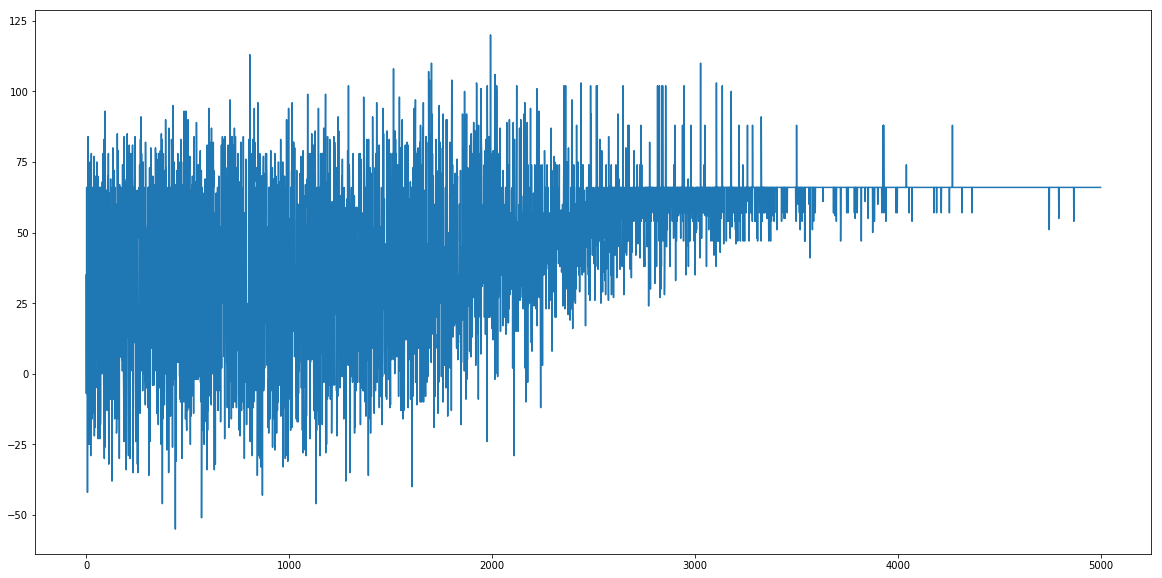

In [18]:
plt.figure(0, figsize=(20, 10))

plt.plot(all_rewards)
plt.show()

In [19]:
# Give the last goal a very high reward and high penalty as well so that it reaches goal
# Also sometimes the reward function also decays with time so that it completes fast

In [ ]:
# PROBLEMS